# APS1070
#### Linear Regression - Project 4

Please fill out the following:


*   Your **name**: Yuchao Wu
*   Your **student number**: 1000651984



## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. (Optional) Replicate Linear Regression code on a blank notebook, without viewing this code. [This is called retrieval practice.](https://www.learningscientists.org/blog/2016/6/23-1)
4. Complete exercises.

## Linear Regression - Introduction

### Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$y = mX + c$

This is the equation for a line that you studied in high school. m is the slope of the line and c is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error.

Are we always fitting a line into the data? What if we have more than 1 feature (independant variable)?

The vectorized form of above equation is written as $y = Xw$, where y and w are vectors while X is a matrix. 

Where is the c term? It is included within the X matrix.

**Hypothesis of Linear Regression**

The linear regression model can be represented by the following equation:

<img src="https://miro.medium.com/max/313/1*A32yDrkQKIU0Z-Nf7JD9Pg.png">

- Y is the predicted value ($h_\theta(x)$)
- θ₀ is the bias term.
- θ₁,…,θₙ are the model parameters
- x₁, x₂,…,xₙ are the feature values.

### LR - Procedure

Our Loss function for Linear regression would be sum of squares, which makes the cost function to be:

<img src="https://miro.medium.com/max/300/1*_y5QA1yF4w6LDDRxfTt6GA.jpeg">

Here yᵢ is the actual value and ȳᵢ is the predicted value. Lets substitute the value of ȳᵢ from $y = mX + c$:

<img src="https://miro.medium.com/max/400/1*3cpC7oHy4IbH3o3Jc-ygVw.jpeg">

Partial Derivative of the above equation with respect to m is shown as $D_m$:

<img src="https://miro.medium.com/max/400/1*FvYfCBrl2gX9K-KxSO1eIw.jpeg">

While the Partial Derivative with respect to c is shown as $D_c$:

<img src="https://miro.medium.com/max/300/1*rj09w2TcBxnHPtQ0oq4ehA.jpeg">

#### Analytical Approach for Linear Regression

Can you derive the Analytical Solution for Linear Regression?

We arrive at the analytical solution when we turn the partial derivatives with respect to the parameters to zero. Why?

This is because at the point where cost function is at the minimum with respect to the parameters (m and c), the derivative of cost function with respect to the parameters would be zero.

$D_m=0$ and $D_c=0$

The solution for the general case comes out to be:

<img src="https://sebastianraschka.com/images/faq/closed-form-vs-gd/closed-form.png">

With $L_2$ Regularization. Cost:

$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j]$

$w = (X^TX + \lambda I)^{-1}X^Ty$

#### Gradient Descent Solution

Gradient descent uses the equations for gradient derived above to find the direction in which we tinker the values of our parameters m and c. 

<img src="https://miro.medium.com/max/300/1*JDcHqFK8jLcgQu1cj2XuVQ.jpeg">

Here the term $L$ is defined as the learning rate.

<img src="https://miro.medium.com/max/864/1*CjTBNFUEI_IokEOXJ00zKw.gif">

#### Any other solutions methods?

Some other solution methods are QR Decomposition, Singular-Value Decomposition.

- Do these methods give exact solutions?
- Do these methods scale well with large datasets?

## Let's Start

Single Feature, 5 data points.

### Analytical Approach in Code

Let's get our hands dirty.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [0]:
n = 5 # number of points
m = 2 # slope of line
c = 4 # y intercept of line
r = 2 # range of data on x-axis

np.random.seed(2) # Qeustions
x = r * np.random.rand(n)
x.sort()
yPerf = m*x + c # perfect world: no noise
y = m*x + c + np.random.randn(n) # imperfect world: we get noisy data

Spoiler Alert: We are in an Imperfect World.

In [0]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

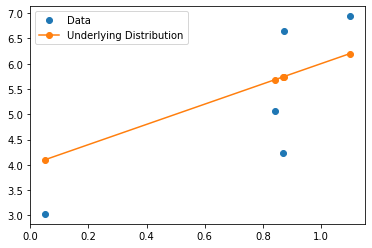

In [0]:
plt.plot(x, y, 'o', label='Data')
plt.plot(x, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
x = np.vstack((np.ones(np.shape(x)), x)).T
y = y.reshape(-1, 1)

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

# prediction
yPred = np.dot(x, w)

In [0]:
w[0], w[1]

(array([2.67741212]), array([3.35314632]))

- How similar are these to the values we had set initially?
- Will they be same as those set initially if there was no noise?

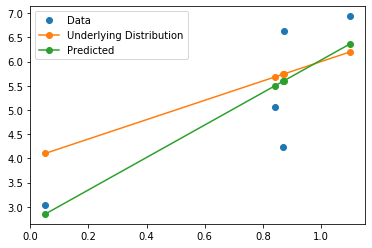

In [0]:
plt.plot(x[:, 1], y, 'o', label='Data')
plt.plot(x[:, 1], yPerf, 'o-', label='Underlying Distribution')
plt.plot(x[:, 1], yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  0.8321853483360432


### Complex Dependant Variable

It's complicated.

In [0]:
n = 20 # number of points
m = 3  # slope of line
c = 10 # y intercept of line
r = 2  # range of data on x-axis

np.random.seed(10)
X = xD = r * np.random.randn(n) # points also stored in xD (xData). will be useful later.
X.sort()
yPerf = X - 2 * (X ** 2) + 0.5 * (X ** 3)
np.random.seed(10)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(0, 5, n) # imperfect world: we get noisy data

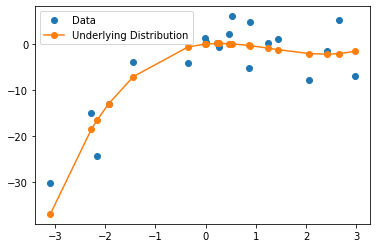

In [0]:
plt.plot(X, y, 'o', label='Data')
plt.plot(X, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
X = np.vstack((np.ones(np.shape(X)), X)).T
y = y.reshape(-1, 1)

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPredLinear = yPred = np.dot(X, w)

w

array([[-5.45917353],
       [ 3.82202654]])

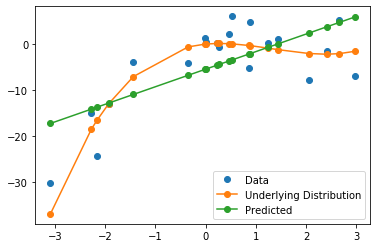

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  6.839531223681816


#### What to do next?

Can we add more features.

In [0]:
X = np.vstack((X.T, xD**2, xD**3)).T

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred4Feature = yPred = np.dot(X, w)

In [0]:
w

array([[ 0.04177438],
       [ 2.58652514],
       [-1.87142105],
       [ 0.19655185]])

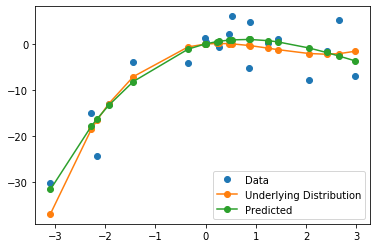

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.929493007090521


But how do we know when to stop, since we would not be knowing when to stop adding features in x.

In [0]:
X = np.vstack((X.T, xD**4, xD**5, xD**6, xD**7)).T

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred8Feature = yPred = np.dot(X, w)

In [0]:
w

array([[-2.64611130e-01],
       [ 8.28612458e+00],
       [-2.07703327e+00],
       [-6.35661778e+00],
       [-1.30720676e-02],
       [ 1.64293567e+00],
       [-2.08380043e-03],
       [-1.09229711e-01]])

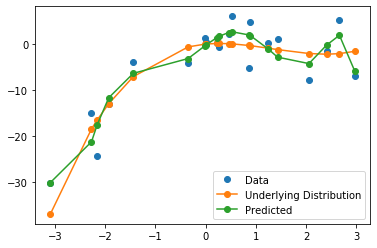

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.3097843019929725


Even though RMSE here (with much more higher features) is lower than previous case, we can see this Predicted Line is quite far from the Underlying distribution. This is called **Overfitting**.

When does the model overfits: when we have more features or comparitively less data for the model.

What exactly is overfitting:
It pays more attention to the noise of the data provided, in a sense trying to rotely memorize everything, 
without generalizing. 

Since we don't know when to stop adding features, what can be done:
- Solution is to work with a model or feature set that can slightly overfit your data, and then use techniques to prevent overfitting from happening.
The alternative gives us underfitting which we cannot fix unless you modify the feature set or model.

Options we have to prevent overfitting. Well there are many, most widely used ones are
- Using a validation set
- Regularization: add penalty on weights

In [0]:
λ = 10 # what is lambda: regularization parameter
f = 8 # number of features

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X) + (λ)*np.identity(f)), np.dot(X.T, y))

# prediction
yPred8FeatRegu = yPred = np.dot(X, w)
w

array([[ 0.21326186],
       [ 0.40727946],
       [-0.46745243],
       [-0.31891582],
       [-0.51080301],
       [ 0.38864889],
       [ 0.03613141],
       [-0.03367748]])

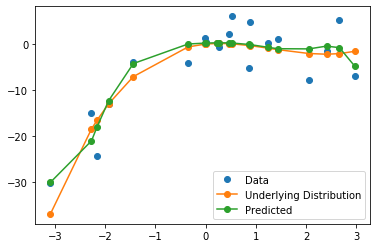

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

Can we know from the plot if the value of λ is optimal:

Somewhat but not exactly. 

To get the exact value of lambda you need to split dataset between training and testing. Then cycle over multiple values of lambda. The most optimum is the one which gives the lowest test error. 

What does low test error represent?

All models together:

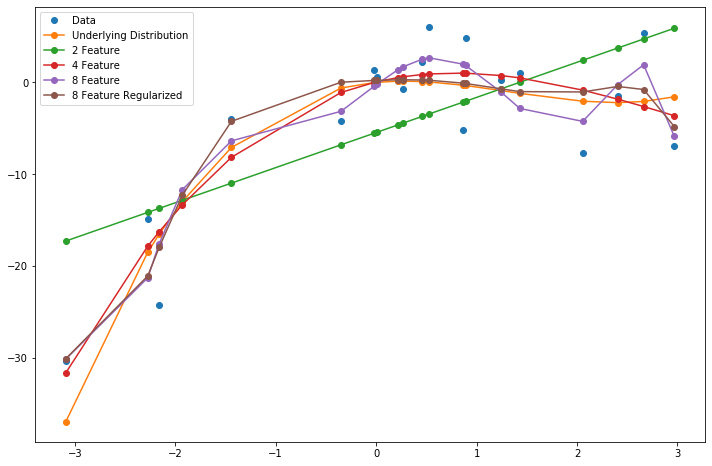

In [0]:
plt.figure(figsize=(12, 8))
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPredLinear, 'o-', label='2 Feature')
plt.plot(xD, yPred4Feature, 'o-', label='4 Feature')
plt.plot(xD, yPred8Feature, 'o-', label='8 Feature')
plt.plot(xD, yPred8FeatRegu, 'o-', label='8 Feature Regularized')

plt.legend()
plt.show()

### Further Complex Multivariate Data

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [0]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [0]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [0]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see that the target value by the name MEDV is missing from the dataframe. It is present in dataset.target.
Let's add that to the df.

In [0]:
df['MEDV'] = dataset.target

Are there any null values in the dataset?

In [0]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Even though there are none, it's a good practice to check.

#### Exploratory Data Analysis

We here use distplot method from the seaborn library, which is another popular graphing library for Python.

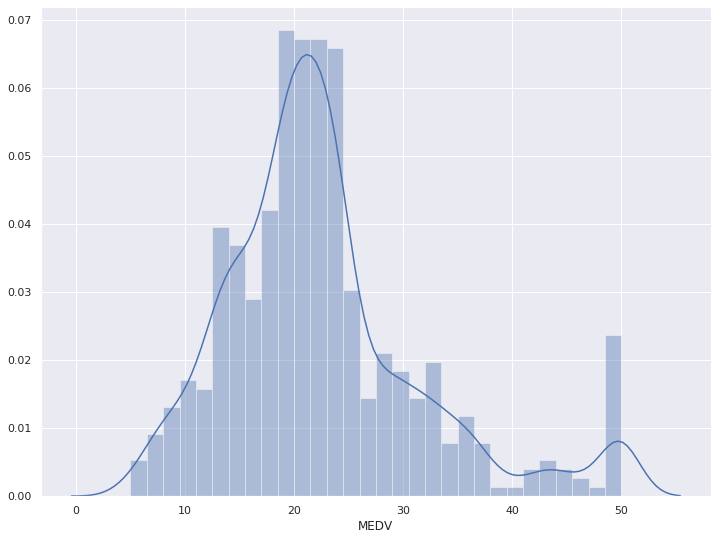

In [0]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

We can see that it mostly normally distributed with a few outliers.

## Linear Regression - Assignment

We'll work with the above dataset for the assignment below. Create a blank notebook for the assignment.

### Question 1

1. Normalize the data using StandardScaler from sklearn. [0.5]
2. Split the multivariate data into training/validation data (20% validation data) and plot train error and validation error as a function of the lambda regularizer. [1]
3. What is the best lambda where the best fit occurs? Use this best lambda from here on out. [Note: You may be surprised by the best lambda here - this won't be the case for all datasets.] [1]

--> Solution: The best lambad would be 0 in this case as the error is the smallest when lambada is zero

In [0]:
# import all the features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
# Define data
X = df.iloc[:,0:13]
# standarize data
Y = df['MEDV'].values.reshape(-1,1)

# check X and Y shape
print('df shape:',df.shape)
print('X shape:',X.shape)
print('Y shape:',Y.shape)


df shape: (506, 14)
X shape: (506, 13)
Y shape: (506, 1)


In [0]:
# Split Original Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True)
# Nomalize the data
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [0]:
# create a matrix of only 1 for training data
one_matrix_train = np.ones((len(X_train_std),1))
one_matrix_test = np.ones((len(X_test_std),1))
one_matrix_train.shape,one_matrix_test.shape

((404, 1), (102, 1))

In [0]:
# Create a design matrix by adding one column of 1

# Training Data
X_train_std = np.hstack((one_matrix_train,X_train_std))
X_train = np.hstack((one_matrix_train,X_train))

# Testing Data
X_test_std = np.hstack((one_matrix_test,X_test_std))
X_test = np.hstack((one_matrix_test,X_test))

# check shape
print('X_train_std shape:',X_train_std.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train_std shape: (404, 14)
y_train shape: (404, 1)
X_test shape: (102, 14)
y_test shape: (102, 1)


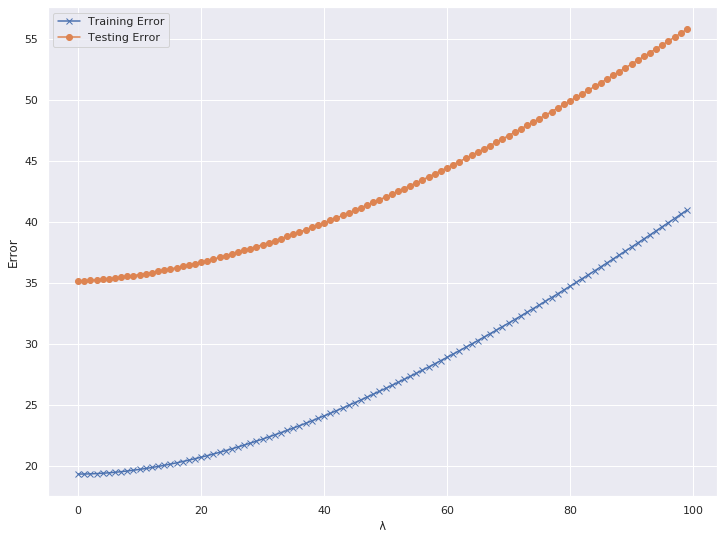

In [0]:
f = len(np.dot(X_train_std.T, X_train_std))
MSE_train =[]
MSE_test =[]
lamb =[]
# define remse fuction
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

def mse(yPred, y):
    return mean_squared_error(yPred, y)

for λ in range (100):
  # Training Error
    w_train = np.dot(np.linalg.inv(np.dot(X_train_std.T, X_train_std) + (λ)*np.identity(f)), np.dot(X_train_std.T, y_train))
    y_train_pred = np.dot(X_train_std,w_train) # Prediction
    MSE_train.append(mse(y_train_pred,y_train))
  
  # Validation Error
    y_test_pred = np.dot(X_test_std,w_train) # Prediction
    MSE_test.append(mse(y_test_pred,y_test))
    lamb.append(λ)

plt.plot(lamb,MSE_train, 'x-', label='Training Error')
plt.plot(lamb,MSE_test, 'o-', label='Testing Error')
plt.xlabel('λ')
plt.ylabel('Error')
plt.legend()
plt.show()

### Question 2

1. Derive the gradient of the $L_2$ regularized objective for Linear Regression, $\frac{\partial}{\partial \theta_j}J(\theta)$. Show your work (either by using in-line equations like we do here, or taking a picture of your work, and emdedding it in the notebook). [1]

2.1\
Cost funtion:$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j]$ 

Derivative function: $\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{2m} [\sum_{i=1}^m \frac{\partial}{\partial \theta_j}(h_\theta (x^{(i)}) - y^{(i)})^2 + \frac{\partial}{\partial \theta_j}(\lambda\sum_{j=1}^n\theta^2_j])$ 

Where: \
$\frac{\partial}{\partial \theta_j}[(h_\theta (x^{(i)}) - y^{(i)})^2] = (2) (h_\theta (x^{(i)}) - y^{(i)})\frac{\partial}{\partial \theta_j}(h_\theta (x^{(i)}) - y^{(i)})$


Then: \

$\frac{\partial}{\partial \theta_j}[h_\theta (x^{(i)}) - y^{(i)}]= [x^{(i)}]_j - 0$


Then: \
$\frac{\partial}{\partial \theta_j}[(h_\theta (x^{(i)}) - y^{(i)})^2] = (2) (h_\theta (x^{(i)}) - y^{(i)})[x^{(i)}]_j$


Next:\
$\frac{\partial}{\partial \theta_j}[\lambda\sum_{j=1}^n\theta^2_j] =2 \lambda\theta_j$


Therefore,\
$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m} [\sum_{i=1}^m (h_\theta (x^{(i)}) - y^{(i)})[x^{(i)}]_j + \lambda\theta_j]$ 


### Question 3

1. Implement batch gradient descent for linear regression using a fixed learning rate $\eta$ of 1e-2. [1.5]

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the matrix solution with the same lambda. [1]

Solution: As shown in the resutls, the two 

Theta:
 [[22.61090501]
 [-0.85712906]
 [ 0.81733942]
 [-0.33314984]
 [ 0.6540868 ]
 [-1.35017346]
 [ 2.78932898]
 [-0.21887302]
 [-2.51446183]
 [ 1.06441597]
 [-0.87277176]
 [-2.19925031]
 [ 0.73688202]
 [-3.47114132]]


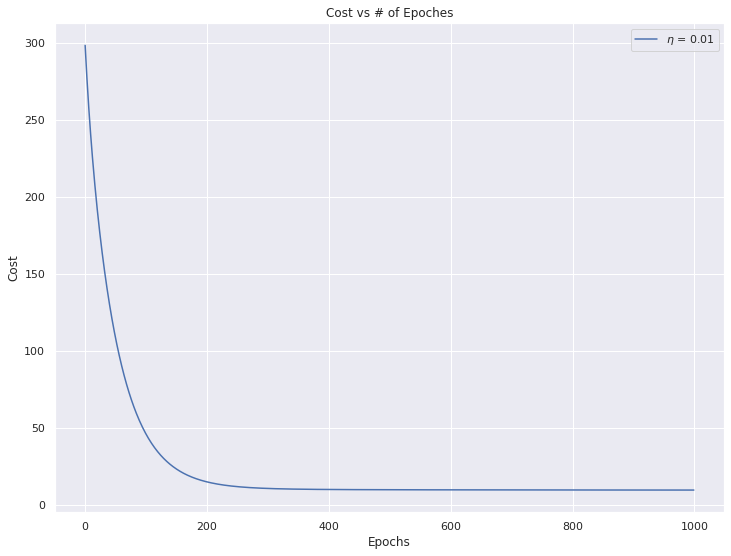

In [0]:
# Gradient Descent
# function to calcuate the derivative of J(theta)
#def derivative(X_train_std,y_train,theta,λ=0):
 # Y_pred = np.dot(X_train_std,theta)# shapea: 14 x 1
 # D = (1/m)*(np.dot(X_train_std.T,(Y_pred-y_train)) + λ * theta)  # Calculate Deravitive vector: 14 x 1
  #return D

m = X_train_std.shape[0]
theta = np.zeros((14,1))
epochs = []
Cost = []
L = 0.01
λ = 0
for i in range (1000):
  Y_pred = np.dot(X_train_std,theta)
  D = (1/m)*(np.dot(X_train_std.T,(Y_pred-y_train)) + λ * theta) 
  theta = theta - L * D # Assigen new values to theta (a column vector: 14 x 1)
  J = 1/(2*m)*(np.dot((Y_pred - y_train).T,(Y_pred - y_train))+ λ * np.dot(theta.T,theta))
  Cost.append(J)
  epochs.append(i)

plt.plot(epochs,np.asarray(Cost).reshape(-1,1),'-',label = '$\eta$ = 0.01')
plt.title('Cost vs # of Epoches')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
print('Theta:\n',theta)

In [0]:
#3.2 Gradient descent approximation
Y_train_D = np.dot(X_train_std,theta)
Y_test_D = np.dot(X_test_std,theta)

error_test_D= rmse(Y_test_D,y_test)
error_train_D= rmse(Y_train_D,y_train)
print('The Gradient descent test data error',error_test_D)
print('The Gradient descent train data error',error_train_D)

The Gradient descent test data error 6.013315623365126
The Gradient descent train data error 4.42047920785911


In [0]:
# Prevrious approximation at lambda = 0
λ = 0
w_train = np.dot(np.linalg.inv(np.dot(X_train_std.T, X_train_std) + (λ)*np.identity(f)), np.dot(X_train_std.T, y_train))

Y_train_λ = np.dot(X_train_std,w_train) 
Y_test_λ = np.dot(X_test_std,w_train)

error_test_λ = rmse(Y_test_λ,y_test)
error_train_λ = rmse(Y_train_λ,y_train)
print('The analytical solution test data error',error_test_λ)
print('The analytical solution train data error',error_train_λ)
print('Weights:\n',w_train)

The analytical solution test data error 5.925910966196951
The analytical solution train data error 4.396188144698282
Weights:
 [[22.61188119]
 [-0.97082019]
 [ 1.05714873]
 [ 0.03831099]
 [ 0.59450642]
 [-1.8551476 ]
 [ 2.57321942]
 [-0.08761547]
 [-2.88094259]
 [ 2.11224542]
 [-1.87533131]
 [-2.29276735]
 [ 0.71817947]
 [-3.59245482]]


In [0]:
# Calculate precison error 
Accuracy_testdata = (error_test_D - error_test_λ)/error_test_D *100
Accuracy_traindata = (error_train_D - error_train_λ)/error_train_D*100
print ("The precision error between two methods for test data set is:", Accuracy_testdata,'%')
print ("The precision error between two methods for train data set is:", Accuracy_traindata,'%')     

The precision error between two methods for test data set is: 1.453518535241337 %
The precision error between two methods for train data set is: 0.5495119876967358 %


**-->Solution: As shown in the plot, the errors converge around 300 to 400 epoches. Also,  the two methods have a very close approximation (the weights are pretty close). For training set, both methods get the error about 4.4 (after 1000 epoches). For test data set, both models get the errors arond 6 (after 1000 epoches). **bold text**

### Question 4

1. Plot training error performance vs. number of epochs as a function of learning rate $\eta$ for a range of values {1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1} with each $\eta$ being a different line. [1]

For very low $\eta$, gradient descent should be slow to converge.  For very high $\eta$, the error might be very unstable (i.e., not decreasing on every epoch).

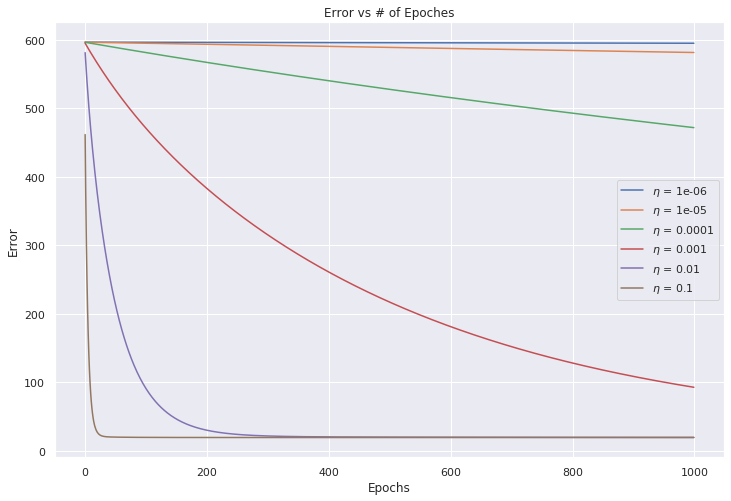

In [0]:
m = X_train_std.shape[0]
theta = np.zeros((14,1))
L_New = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

plt.figure(figsize = (12,8))
for LearningRate in L_New:
  theta = np.zeros((14,1)) # reset theta to zero vectors for each 𝜂 
  error_train_D =[]
  epochs = []
  for i in range (1000):
    Y_pred = np.dot(X_train_std,theta)
    D = (1/m)*(np.dot(X_train_std.T,(Y_pred-y_train)) + λ * theta)
    delta_theta = LearningRate * D
    theta = theta -LearningRate*D # Assigen new values to theta (a column vector: 14 x 1)
    Y_train_D = np.dot(X_train_std,theta)
    error_train_D.append(mse(Y_train_D,y_train))
    epochs.append(i)
  plt.plot(epochs,error_train_D,'-',label = '$\eta$ = {}'.format(LearningRate))
  plt.title('Error vs # of Epoches')
  plt.xlabel('Epochs')
  plt.ylabel('Error')
  plt.legend()

### Question 5

Implement a mini-batch version with a batch_size constant B.  When B=1, it is stochastic gradient descent.  When B=#train data points, it is full-batch.  Anywhere in between is mini-batch.  

1. Choose B=1, B=16, B=128, B=256, and B=#data points and plot training error as a function of "# of gradient updates" and also separately as a function of "wall-clock time" for each value of B. [2]

2. All lines should be on the same plot. Which B leads to fastest convergence in terms of #gradient updates and in terms of "wall-clock time"? [1]

In [0]:
import time

In [0]:
# function to calculate gradient descent for each batch_size
def gradientDescent(X_train_std,y_train,batch_size = 1):
  t0 = time.time() # set the reference time
  m = X_train_std.shape[0]  # m = 404
  L = 0.01
  lad = 0
  np.random.seed(42)
  theta = np.random.randn(14, 1) #theta = np.zeros((14,1))
  time_history = [] # reset time to zero for each batch
  error_train_D = []

  for i in range (20):
    mini_batches = []
    Data = np.hstack((X_train_std,y_train))
    np.random.shuffle(Data)
    m = X_train_std.shape[0]
   
    for j in range (0,m,batch_size): # e.g.,m =404, batch_size = 1,16
      
      mini_batches = Data[0+j:batch_size+j,:] # select 0th row to batch_size row with all cols
      X_MB = mini_batches[:,:-1]
      Y_MB = mini_batches[:,-1].reshape((-1,1))
      Y_pred = np.dot(X_MB,theta) 
      Y_P = np.dot(X_train_std,theta)
      D = (1/batch_size)*(np.dot(X_MB.T,(Y_pred-Y_MB)) + lad * theta) # Calculate Deravitive vector: 14 x 1
      theta = theta - L * D
      error_train_D.append(mse(Y_P,y_train)/2)
      
      time_history.append(time.time() - t0) # Calculate the time for each epoch
  return epochs,time_history,error_train_D

<Figure size 1440x1440 with 0 Axes>

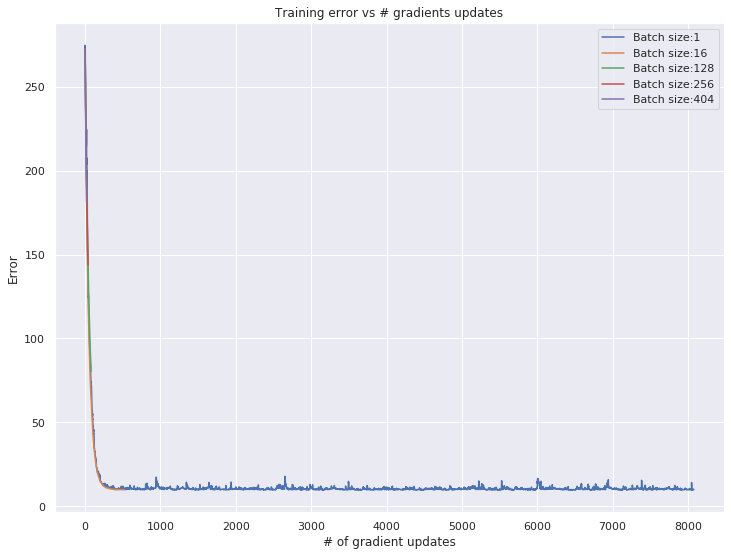

<Figure size 1440x1440 with 0 Axes>

In [0]:
for batch_size in [1,16,128,256,404]:
  counter = []
  epochs,time_history,error_train_D= gradientDescent(X_train_std,y_train,batch_size = batch_size)
  for j in range(0,len(error_train_D)):
    counter.append(j)

  plt.plot(counter,error_train_D,'-',label = 'Batch size:{}'.format(batch_size))
  plt.title('Training error vs # gradients updates')
  plt.xlabel('# of gradient updates')
  plt.ylabel('Error')
  plt.legend()
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

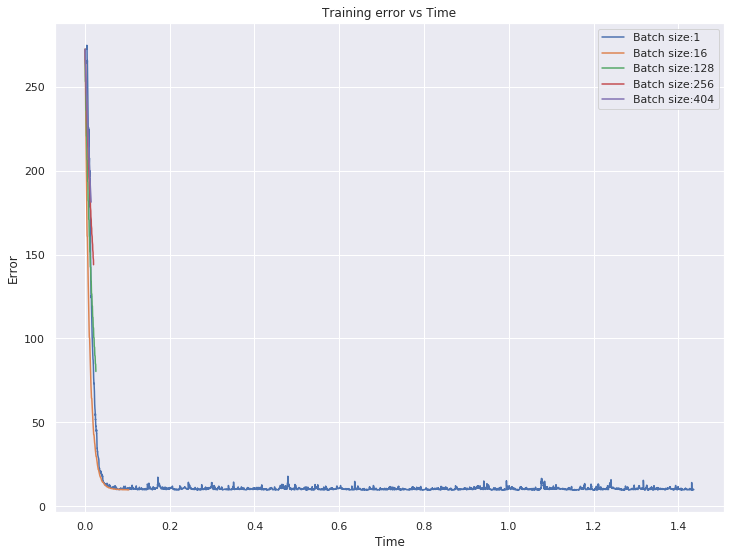

<Figure size 1440x1440 with 0 Axes>

In [0]:
for batch_size in [1,16,128,256,404]:
  epochs,time_history,error_train_D = gradientDescent(X_train_std,y_train,batch_size = batch_size) 
  
  plt.plot(time_history,error_train_D,'-',label = 'Batch size:{}'.format(batch_size))
  plt.title('Training error vs Time')
  plt.xlabel('Time')
  plt.ylabel('Error')
  plt.legend()
plt.figure(figsize=(20,20))

**--> Solution: In terms of # of gradient upadates, both B = 16 and B =1 seem to converge faster the others, but B =1 has many noises. In terms of time, B = 16 seems to coverge at the fastest rate than any other batch size. **

### Question 6

1. Switch to absolute error for loss but still use $L_2$ regularization. Derive the gradient for this case, $\frac{\partial}{\partial \theta_j}J(\theta)$. [1.5]


2. Tune $\eta$ and B to obtain good performance (fast convergence to minimum error, but not noisy).  Is it easier to train with squared error or absolute error, why?  Show some plots that help you demonstrate this point and explain. [1]

**--> Solutions: **

**Q2 part 1: As shown from figure 3 and 4, the errors for B =1,8,128,256 and 404 @ $\eta$ = 0.1 and 0.01 are ploted as the following. Overall, the restuls converage relatively faster when B = 8 and $\eta$ = 0.1.**

**Q2 part 2: It would be easier to train the model that computes the squred error. As shown in figure 1 and 2, the resutls are ploted as the same paramters (B = 1, 16, 128,256 and 404 and $\eta$ = 0.01) as the ones in question 5. However, the abosolute errors model takes longer to converage when having same learing rate and batch sizes as the question 5. In addition, the absolute error cost fucntion has a linear error growth while the MSE erros grow exponetially with larger values of distance, adding a massive penalty to points which are far away and a minimal penalty for poitns which are close to the expected result.**

Questions: 6.1
Cost Function: $J(\theta) = \frac{1}{2m}[\sum_{i=1}^m|h_\theta (x^{(i)}) - y^{(i)}| + \lambda\sum_{j=1}^n\theta^2_j]$ 

Derivative function: $\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{2m} [\sum_{i=1}^m \frac{\partial}{\partial \theta_j}(|h_\theta (x^{(i)}) - y^{(i)}|) + \frac{\partial}{\partial \theta_j}(\lambda\sum_{j=1}^n\theta^2_j])$ 

Where:
$|h_\theta (x^{(i)}) - y^{(i)}| = \sqrt(h_\theta (x^{(i)}) - y^{(i)})^2 = [h_\theta (x^{(i)}) - y^{(i)})^2]^\frac{1}{2}\$

$\frac{\partial}{\partial \theta_j}(|h_\theta (x^{(i)}) - y^{(i)}|) = \frac{1}{2}[h_\theta (x^{(i)}) - y^{(i)})^2]^\frac{-1}{2}\frac{\partial}{\partial \theta_j}[(h_\theta (x^{(i)}) - y^{(i)})^2]= \frac{1}{2}[h_\theta (x^{(i)}) - y^{(i)})^2]^\frac{-1}{2}(2) (h_\theta (x^{(i)}) - y^{(i)})\frac{\partial}{\partial \theta_j}(h_\theta (x^{(i)}) - y^{(i)})= (1)[h_\theta (x^{(i)}) - y^{(i)})^2]^\frac{-1}{2}(h_\theta (x^{(i)}) - y^{(i)})[x^{(i)}]_j = \frac{h_\theta (x^{(i)}) - y^{(i)}}{\sqrt(h_\theta (x^{(i)}) - y^{(i)})^2} [x^{(i)}]_j = \frac{h_\theta (x^{(i)}) - y^{(i)}}{|h_\theta (x^{(i)}) - y^{(i)}|} [x^{(i)}]_j$

Next:\
$\frac{\partial}{\partial \theta_j}[\lambda\sum_{j=1}^n\theta^2_j] =2 \lambda\theta_j$\
Therefore,\
$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{2m} [\sum_{i=1}^m \frac{h_\theta (x^{(i)}) - y^{(i)}}{|h_\theta (x^{(i)} - y^{(i)}|} [x^{(i)}]_j + 2 \lambda\theta_j]$ 

In [0]:
import time

# For Each Batch_size: 1, 16,... and different learning rate
def gradientDescent(X_train_std,y_train,batch_size,L):
  t0 = time.time() # set the reference time
  m = X_train_std.shape[0]  # m = 404
  #L = 0.01
  np.random.seed(42)
  theta = np.random.randn(14, 1)
  epochs = []
  time_history = [] # reset time to zero for each batch
  error_train_D = [] #Total_error_train_D =[]
  lad = 0
  for i in range (20):
    mini_batches = []
    Data = np.hstack((X_train_std,y_train))
    np.random.shuffle(Data)
    m = X_train_std.shape[0]
    
    for j in range (0,m,batch_size): # e.g.,m =404, batch_size = 1,16
      mini_batches = Data[0+j:batch_size+j,:] # select 0th row to batch_size row with all cols
      X_MB = mini_batches[:,:-1]
      Y_MB = mini_batches[:,-1].reshape((-1,1))
      Y_pred = np.dot(X_MB,theta)
      Y_P = np.dot(X_train_std,theta)
      ABS_D = (1/2/batch_size)*(np.dot(X_MB.T,(Y_pred-Y_MB)/abs(Y_pred-Y_MB))+ 2*lad*theta)
      theta = theta - L * ABS_D
      error_train_D.append(mse(Y_P,y_train)/2)  
      time_history.append(time.time() - t0) # Calculate the time for each gradient update
    epochs.append(i)
  return epochs,time_history,error_train_D

<Figure size 1440x1440 with 0 Axes>

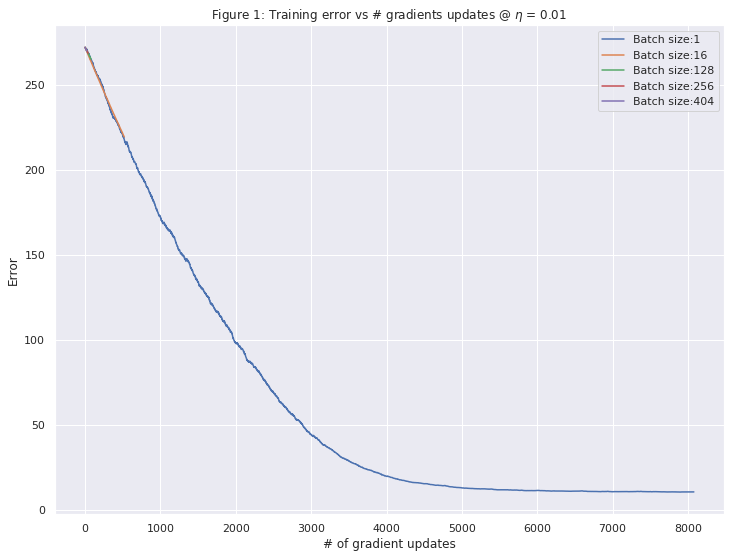

<Figure size 1440x1440 with 0 Axes>

In [0]:
# Learning rate = 0.01
for batch_size in [1,16,128,256,404]:
  counter = []
  epochs,time_history,error_train_D = gradientDescent(X_train_std,y_train,batch_size = batch_size,L=0.01)
  for j in range(0,len(error_train_D)):
    counter.append(j)
  
  plt.plot(counter,error_train_D,'-',label = 'Batch size:{}'.format(batch_size))
  plt.title('Figure 1: Training error vs # gradients updates @ $\eta$ = 0.01')
  plt.xlabel('# of gradient updates')
  plt.ylabel('Error')
  plt.legend()
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

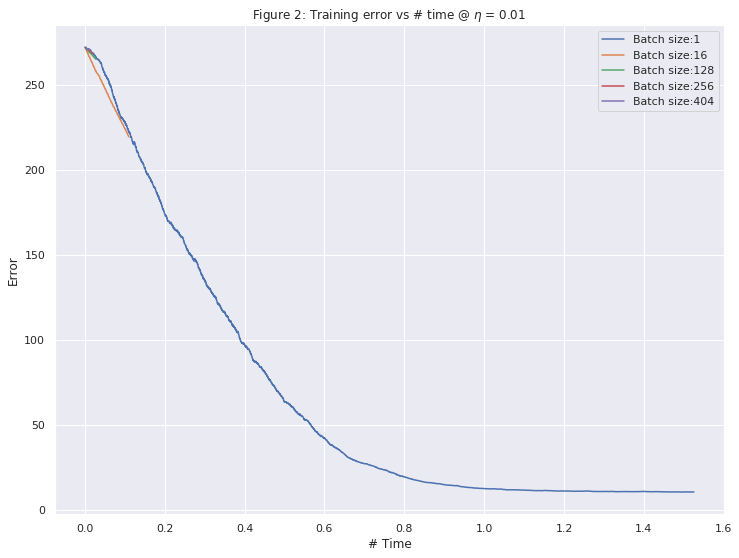

<Figure size 1440x1440 with 0 Axes>

In [0]:
# Learning rate = 0.01
for batch_size in [1,16,128,256,404]:
  epochs,time_history,error_train_D = gradientDescent(X_train_std,y_train,batch_size = batch_size,L =0.01)
  plt.plot(time_history,error_train_D,'-',label = 'Batch size:{}'.format(batch_size))
  plt.title('Figure 2: Training error vs # time @ $\eta$ = 0.01')
  plt.xlabel('# Time')
  plt.ylabel('Error')
  plt.legend()
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

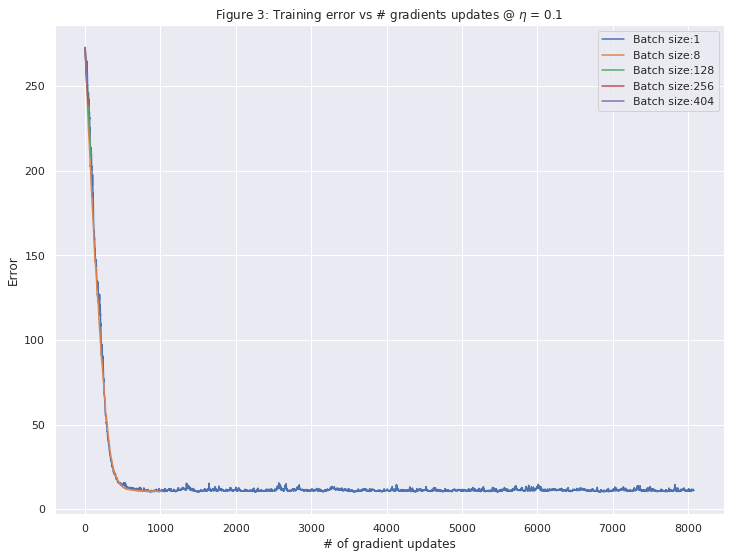

<Figure size 1440x1440 with 0 Axes>

In [0]:
# Learning rate = 0.1
for batch_size in [1,8,128,256,404]:
  counter = []
  epochs,time_history,error_train_D = gradientDescent(X_train_std,y_train,batch_size = batch_size,L=0.1)
  
  for j in range(0,len(error_train_D)):
    counter.append(j)
 
  plt.plot(counter,error_train_D,'-',label = 'Batch size:{}'.format(batch_size))
 
  plt.title('Figure 3: Training error vs # gradients updates @ $\eta$ = 0.1')
  plt.xlabel('# of gradient updates')
  plt.ylabel('Error')
  plt.legend()
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

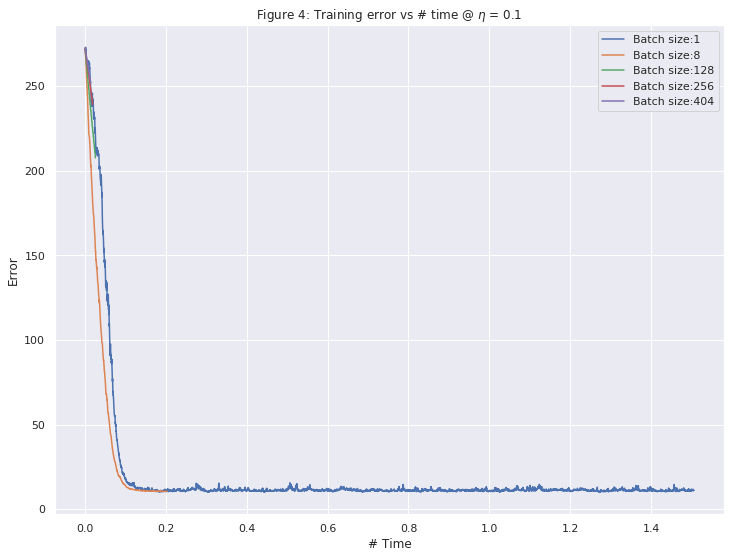

<Figure size 1440x1440 with 0 Axes>

In [0]:
# Learning rate = 0.1
for batch_size in [1,8,128,256,404]:
  epochs,time_history,error_train_D = gradientDescent(X_train_std,y_train,batch_size = batch_size,L =0.1)
  plt.plot(time_history,error_train_D,'-',label = 'Batch size:{}'.format(batch_size))
  plt.title('Figure 4: Training error vs # time @ $\eta$ = 0.1')
  plt.xlabel('# Time')
  plt.ylabel('Error')
  plt.legend()
plt.figure(figsize=(20,20))

### Question 7 (Optional)

1. Does the model perform better if polynomial features are added (Use sklearn.preprocessing.PolynomialFeatures to test it out).


2. Does the optimal value of λ (regularization constant) change with this new set of features added.

## References

Linear Regression:
1. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html

Gradient Descent (images and equations):
1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
2. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

Author: Parth Jaggi